![school](dom-fou-YRMWVcdyhmI-unsplash.jpg)

# Initial Regression Model
### Normalizing and formatting data appropriately
For the categorical varaibles, as discovered in my EDA notebook, I'll create dummy values.

In [4]:
#import the appropriate tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.figure_factory import create_scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [5]:
#import the data
df = pd.read_csv('test_scores 2.csv')
#fix dtypes
for column in df.columns:
    print(column,':',df[column].dtypes)

school : object
school_setting : object
school_type : object
classroom : object
teaching_method : object
n_student : float64
student_id : object
gender : object
lunch : object
pretest : float64
posttest : float64


In [6]:
#create dummies for categorical variables
cols_to_fix = ['school_type','teaching_method','gender','lunch','school','school_setting','classroom']
dummies = pd.DataFrame()
for item in cols_to_fix:
    new = pd.get_dummies(df[item],prefix=item,drop_first=True)
    dummies = pd.concat([dummies,new],axis=1)

In [7]:
#drop og columns
df.drop(cols_to_fix,axis=1,inplace=True)
df = df.drop(['student_id'],axis=1)

In [8]:
#attach leftover og to dummies
df = pd.concat([df,dummies],axis=1)
#fix spaces in lunch column name
df=df.rename(columns={"lunch_Qualifies for reduced/free lunch": "free_lunch"})
df.head()

,n_student,pretest,posttest,school_type_Public,teaching_method_Standard,gender_Male,free_lunch,school_CCAAW,school_CIMBB,school_CUQAM,...,classroom_XJ8,classroom_XXE,classroom_XXJ,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS
0,20.0,62.0,72.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.0,66.0,79.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,64.0,76.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,61.0,77.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,64.0,76.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


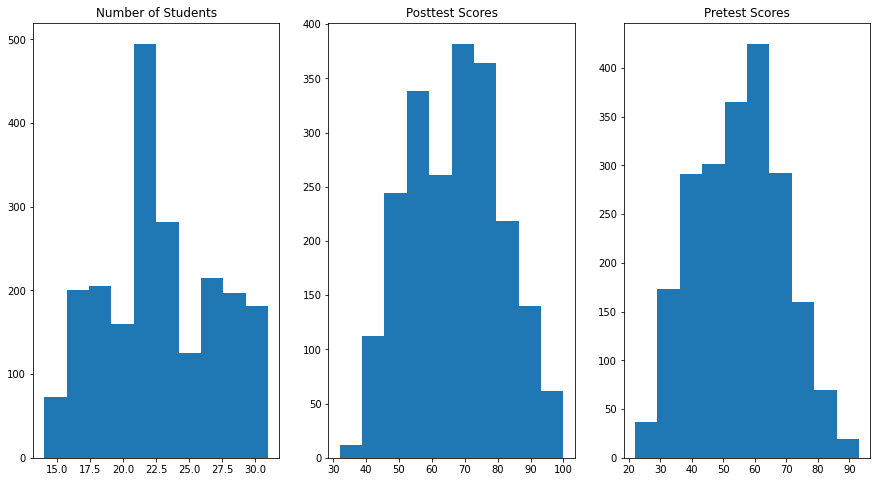

In [9]:
#plot the distribution of the numerical data
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,8))
plt.style.use('seaborn-colorblind')
ax1.hist(df['n_student'],label='Number of Students')
ax2.hist(df['posttest'])
ax3.hist(df['pretest'])
ax1.title.set_text('Number of Students')
ax2.title.set_text('Posttest Scores')
ax3.title.set_text('Pretest Scores');

In [10]:
#create initial model with categoricals and without pretest
outcome = 'posttest'
predictors = df.drop(['posttest','pretest'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     433.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:47:45   Log-Likelihood:                -5361.5
No. Observations:                2133   AIC:                         1.092e+04
Df Residuals:                    2034   BIC:                         1.148e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   45.8049      0.332    137.868      0.000      45.153      46.456
n_student                    1.2219      0.023     53.639      0.000       1.177       1.267
school_type_Public          -7.1393      0.220    -32.465      0.000      -7.571      -6.708
teaching_method_Standard    -5.3368      0.153    -34.906      0.000      -5.637      -5.037
gender_Male                 -0.5516      0.136     -4.051      0.000      -0.819      -0.285
free_lunch                  -3.2898      0.230    -14.329      0.000      -3.740      -2.840
school_CCAAW                 1.4196      0.240      5.922      0.000       0.950       1.890
school_CIMBB                11.2914      0.290     38.973      0.000      10.723      11.860
school_CUQAM                 0.2200      0.234      0.940      0.347      -0.239       0.679
school_DNQDD                -7.0072      0.224    -31.254      0.000      -7.447      -6.568
school_FBUMG                11.1165      0.307     36.183      0.000      10.514      11.719
school_GJJHK                -6.2822      0.238    -26.408      0.000      -6.749      -5.816
school_GOKXL                 3.3100      0.274     12.097      0.000       2.773       3.847
school_GOOBU               -10.7436      0.225    -47.722      0.000     -11.185     -10.302
school_IDGFP                17.4639      0.550     31.750      0.000      16.385      18.543
school_KFZMY               -10.9467      0.303    -36.116      0.000     -11.541     -10.352
school_KZKKE                -7.2233      0.255    -28.284      0.000      -7.724      -6.722
school_LAYPA                11.7810      0.291     40.527      0.000      11.211      12.351
school_OJOBU                 7.9442      0.262     30.322      0.000       7.430       8.458
school_QOQTS                 0.7486      0.222      3.376      0.001       0.314       1.183
school_UAGPU                 0.4334      0.251      1.725      0.085      -0.059       0.926
school_UKPGS                15.0569      0.232     64.781      0.000      14.601      15.513
school_UUUQX                 4.0529      0.251     16.129      0.000       3.560       4.546
school_VHDHF                 3.6977      0.314     11.787      0.000       3.082       4.313
school_VKWQH                 4.5468      0.248     18.322      0.000       4.060       5.033
school_VVTVA               -13.5928      0.242    -56.192      0.000     -14.067     -13.118
school_ZMNYA                 4.0833      0.260     15.726      0.000       3.574       4.593
school_ZOWMK               -10.4143      0.237    -43.858      0.000     -10.880      -9.949
school_setting_Suburban     11.7567      0.139     84.826      0.000      11.485      12.029
school_setting_Urban        -1.1247      0.183     -6.147      0.000      -1.483      -0.766
classroom_08N 

In [88]:
list(predictors.columns)

['n_student',
 'school_type_Public',
 'teaching_method_Standard',
 'gender_Male',
 'free_lunch',
 'school_CCAAW',
 'school_CIMBB',
 'school_CUQAM',
 'school_DNQDD',
 'school_FBUMG',
 'school_GJJHK',
 'school_GOKXL',
 'school_GOOBU',
 'school_IDGFP',
 'school_KFZMY',
 'school_KZKKE',
 'school_LAYPA',
 'school_OJOBU',
 'school_QOQTS',
 'school_UAGPU',
 'school_UKPGS',
 'school_UUUQX',
 'school_VHDHF',
 'school_VKWQH',
 'school_VVTVA',
 'school_ZMNYA',
 'school_ZOWMK',
 'school_setting_Suburban',
 'school_setting_Urban',
 'classroom_08N',
 'classroom_0N7',
 'classroom_18K',
 'classroom_197',
 'classroom_1Q1',
 'classroom_1SZ',
 'classroom_1UU',
 'classroom_1VD',
 'classroom_21Q',
 'classroom_2AP',
 'classroom_2B1',
 'classroom_2BR',
 'classroom_341',
 'classroom_3D0',
 'classroom_3XJ',
 'classroom_4NN',
 'classroom_5JK',
 'classroom_5LQ',
 'classroom_5SZ',
 'classroom_62L',
 'classroom_6C1',
 'classroom_6OL',
 'classroom_6U9',
 'classroom_7BL',
 'classroom_98D',
 'classroom_9AW',
 'classr

In [37]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 3.9747928516540783),
 ('Prob', 0.13705178582881888),
 ('Skew', -0.006669477216022798),
 ('Kurtosis', 3.2110580012892376)]

> **Comments:** The Jarque-Bera result is about halfway between 0 and 6... need to do research on how best to interperet...the p-value of 0.13 is slightly too high to reject the null hypothesis for normality. The level of skew and kurtosis are in favor of normality.I suspect dropping some of the classroom variables will cause us to see an improvement in model performance.

# Checking for Normality

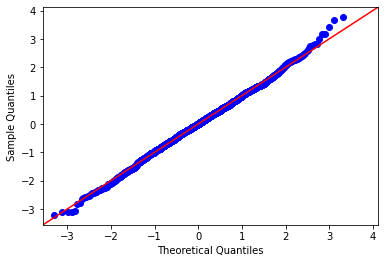

In [38]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

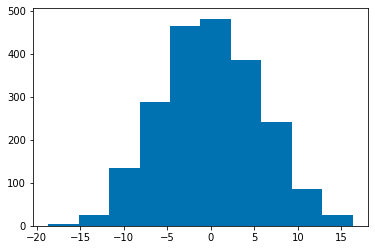

In [97]:
plt.hist(model.resid);

> **Comments:** Overall looks good, would like to drop that outlier. Both ends tip up a bit might try a transformation or two to further normalize that

# Check for Homoscedasticity

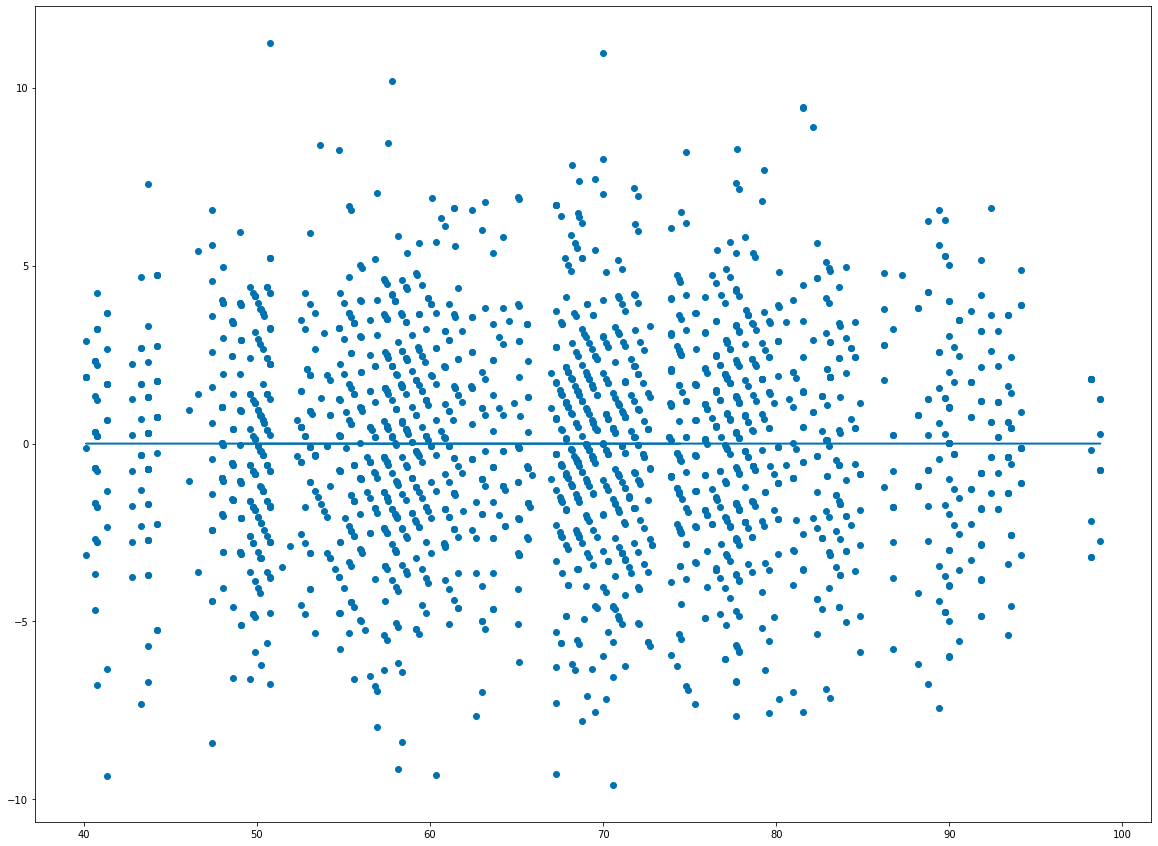

In [39]:
plt.figure(figsize=(20, 15))
plt.scatter(model.predict(df), model.resid)
plt.plot(model.predict(df), [0 for i in range(len(df))]);

> **Comments:** Overall looks good, again with the one outlier. Actually quite happy with the level of homoscedacity.

# Cross Validation

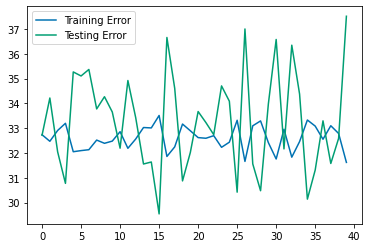

In [105]:
#Run 40 different linear regressions with different train/test splits
y= df[['posttest']]
X= predictors
linreg = LinearRegression()

num = 40
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [106]:
reg_q = LinearRegression().fit(X, y)
print('RMSE:',np.sqrt(mean_squared_error(y, reg_q.predict(X))))
print('R**2 Score:',r2_score(y, reg_q.predict(X)))

RMSE: 5.713884580742653
R**2 Score: 0.8330330382953786


### Check the Cross Validation Score

In [107]:
cv5 = cross_val_score(linreg,X,y,cv=5,scoring='neg_mean_squared_error')
print((-cv5)**0.5)
print(np.mean(cv5))

[ 8.77130105 10.54712055 12.7261541  13.0308641  12.65185561]
-136.0010683839842


> **Comments:** Ok, not great. This model, though it has a high R-squared value, is very sensitive to different training/testing data, which makes me think it is overfit.

In [108]:
cross_val_score(linreg,X,y,cv=5,scoring='r2')

array([-0.24748178,  0.30574913,  0.33644602, -0.34188048,  0.05708857])

> **Comments:** Wow, huge range. Definitely need to address overfitting.

# Model Refinement

In [109]:
drop = ['school_CUQAM','school_UAGPU','school_UUUQX','school_VHDHF','classroom_08N','classroom_0N7',
        'classroom_18K','classroom_197','classroom_1Q1','classroom_1SZ',
        'classroom_1UU','classroom_1VD','classroom_21Q','classroom_2AP',
        'classroom_2B1','classroom_2BR','classroom_341','classroom_3D0',
        'classroom_3XJ','classroom_4NN','classroom_5JK','classroom_5LQ',
        'classroom_5SZ','classroom_62L','classroom_6C1','classroom_6OL',
        'classroom_6U9','classroom_7BL','classroom_98D','classroom_9AW',
        'classroom_A33','classroom_A93','classroom_AE1','classroom_AJ1',
        'classroom_BFY','classroom_CD8','classroom_CII','classroom_CXC',
        'classroom_D33','classroom_DFQ','classroom_EID','classroom_ENO',
        'classroom_EPS','classroom_FS3','classroom_G2L','classroom_GYM',
        'classroom_H7S','classroom_HCB','classroom_HKF','classroom_HUJ',
        'classroom_IEM','classroom_IPU','classroom_IQN','classroom_J6X',
        'classroom_J8J','classroom_JGD','classroom_KR1','classroom_KXB',
        'classroom_NOR','classroom_NWZ','classroom_O6A','classroom_OMI',
        'classroom_P2A','classroom_P8I','classroom_PBA','classroom_PC6',
        'classroom_PGH','classroom_PGK','classroom_PW5','classroom_Q0E',
        'classroom_QA2','classroom_QTU','classroom_RA5','classroom_RK7',
        'classroom_ROP','classroom_S98','classroom_SSP','classroom_ST7',
        'classroom_SUR','classroom_TB5','classroom_TSA','classroom_U6J',
        'classroom_UHU','classroom_UWK','classroom_V77','classroom_VA6',
        'classroom_W8A','classroom_X2O','classroom_X6Z','classroom_X78',
        'classroom_XJ8','classroom_XXE','classroom_XXJ','classroom_XZ4',
        'classroom_XZM','classroom_YTB','classroom_YUC','classroom_ZBH',
        'classroom_ZDT','classroom_ZNS']
df = df.drop(drop,axis=1)

In [110]:
#second model iteration
outcome = 'posttest'
predictors = df.drop(['posttest','pretest','gender_Male'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     437.7
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:22:17   Log-Likelihood:                -6745.2
No. Observations:                2133   AIC:                         1.354e+04
Df Residuals:                    2108   BIC:                         1.368e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.3232      1.363     49.404      0.000      64.651      69.996
n_student                    0.2536      0.060      4.237      0.000       0.136       0.371
school_type_Public          -7.1952      0.752     -9.574      0.000      -8.669      -5.721
teaching_method_Standard    -5.9361      0.289    -20.554      0.000      -6.502      -5.370
free_lunch                  -3.3981      0.426     -7.976      0.000      -4.234      -2.563
school_CCAAW                -1.8968      0.821     -2.310      0.021      -3.507      -0.286
school_CIMBB                 5.4575      0.966      5.651      0.000       3.563       7.352
school_DNQDD                -5.9854      0.817     -7.326      0.000      -7.588      -4.383
school_FBUMG                 8.1510      1.209      6.744      0.000       5.781      10.521
school_GJJHK                -5.5303      0.844     -6.556      0.000      -7.185      -3.876
school_GOKXL                 3.9042      1.277      3.057      0.002       1.399       6.409
school_GOOBU               -13.2286      0.763    -17.332      0.000     -14.725     -11.732
school_IDGFP                14.5477      0.913     15.938      0.000      12.758      16.338
school_KFZMY               -17.8053      1.130    -15.757      0.000     -20.021     -15.589
school_KZKKE                -8.5246      1.196     -7.129      0.000     -10.870      -6.179
school_LAYPA                12.6927      1.372      9.250      0.000      10.002      15.384
school_OJOBU                 7.6322      1.283      5.947      0.000       5.116      10.149
school_QOQTS                -1.8417      0.703     -2.620      0.009      -3.220      -0.463
school_UKPGS                16.8686      0.757     22.276      0.000      15.384      18.354
school_VKWQH                 3.4370      1.257      2.735      0.006       0.973       5.901
school_VVTVA               -16.1219      0.842    -19.154      0.000     -17.772     -14.471
school_ZMNYA                 6.0823      0.901      6.749      0.000       4.315       7.850
school_ZOWMK               -11.2160      0.823    -13.624      0.000     -12.830      -9.602
school_setting_Suburban     11.8452      1.053     11.252      0.000       9.781      13.910
school_setting_Urban         4.0546      1.139      3.561      0.000       1.822       6.287
==============================================================================
Omnibus:                        8.425   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.819
Skew:                           0.047   Prob(JB):                       0.0331
Kurtosis:                       2.740   Cond. No.                         586.
==============================================================================

Note

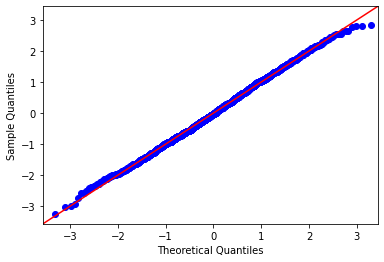

In [111]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

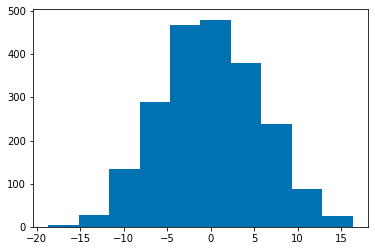

In [112]:
plt.hist(model.resid);

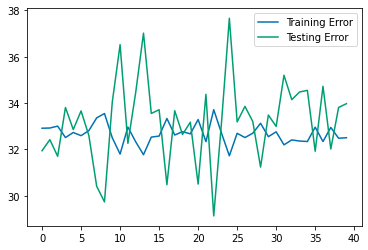

In [114]:
y= df[['posttest']]
X= predictors
linreg = LinearRegression()

num = 40
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [58]:
# engineer a feature
# df['score_growth'] = df.posttest-df.pretest
# try OHE n_student

In [ ]:
#recursive modeling

In [ ]:
#build a predictor function

In [ ]:
#dashapp using predictor function